In [131]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [5]:
import numpy as np;
import pandas as pd;
from sklearn.neighbors import KNeighborsClassifier;
Iris = pd.read_csv('iris.csv')
Iris_sample = Iris.sample(n=10)
Iris_sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
104,105,6.5,3.0,5.8,2.2,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
114,115,5.8,2.8,5.1,2.4,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [18]:
Iris = Iris.fillna(Iris.median())
Iris.info()
Iris

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [23]:
Iris['Species']=Iris['Species'].astype('category').cat.codes.astype('int') 
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [31]:
Iris.corrwith(Iris['Species'])
#There is no value which is in the above mentioned range hence no column is dropped

Id               0.942753
SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
dtype: float64

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [32]:
Iris.var()
#There is no variance which is less than 0.1 

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

In [34]:
import seaborn as sns;

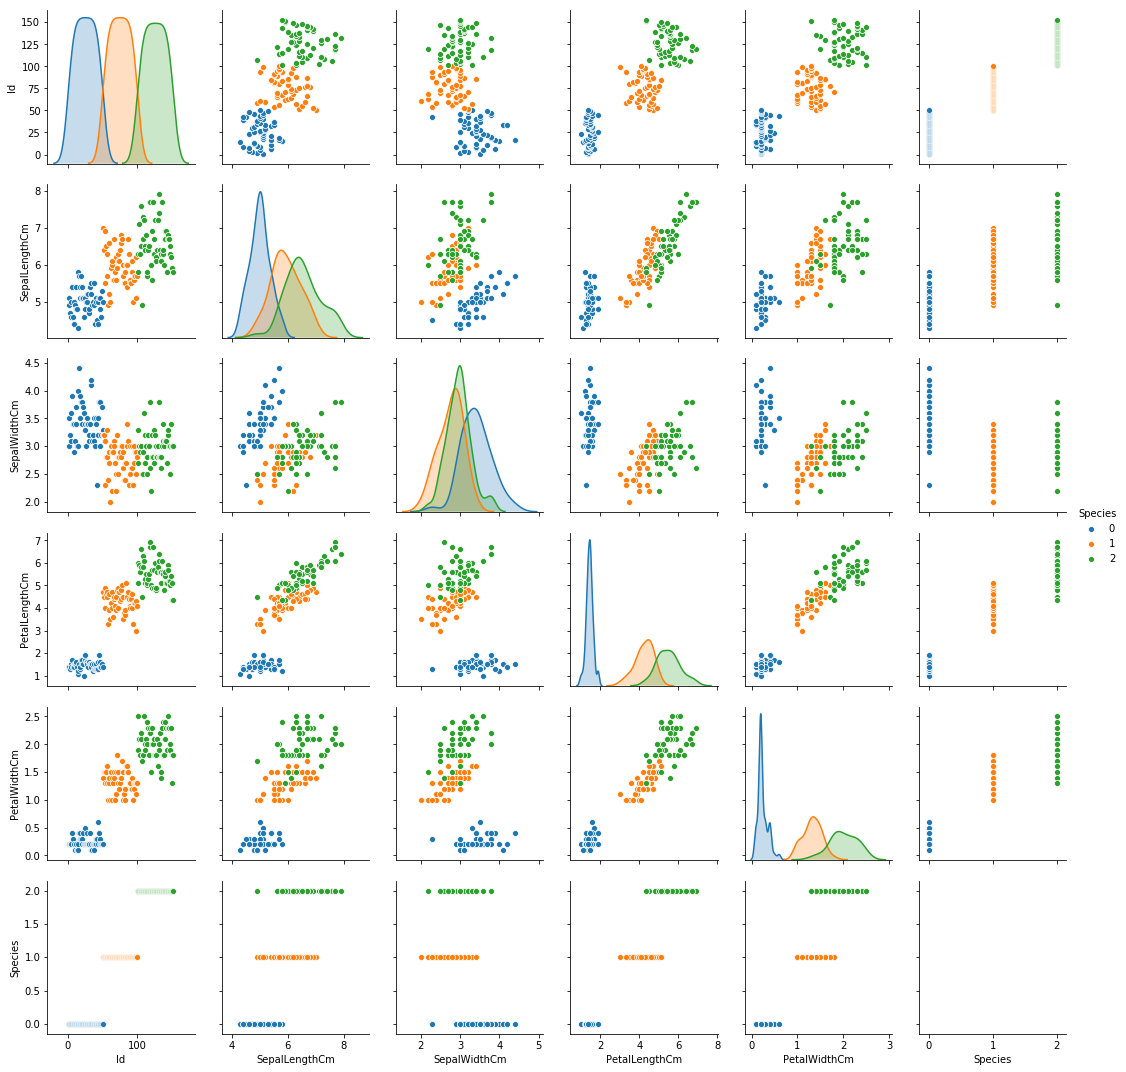

In [39]:
sns.pairplot(Iris,hue='Species')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [40]:
from sklearn.model_selection import train_test_split

In [46]:
Iris_X = Iris.drop(['Id','Species'],axis=1)#X for train
Iris_Y = Iris['Species'] #Y for train
# print(Iris_without_id)
# print(Iris_X)
X_train, X_test, y_train, y_test = train_test_split(Iris_X, Iris_Y, test_size=0.20, random_state=10)

In [51]:
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
sc = StandardScaler()
sc.fit(X_train)
X_train_scalar = sc.transform(X_train)
X_test_scalar = sc.transform(X_test)
#Standardization done

In [68]:
k_range = [3,5,9];
scores = {}
i=0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scalar,y_train)
    y_predict = knn.predict(X_test_scalar)
    print(metrics.accuracy_score(y_test,y_predict))
    scores[i] = metrics.accuracy_score(y_test,y_predict)
    i=i+1
    print(y_predict)
    
print(scores)

0.9354838709677419
[2 2 0 2 0 2 0 1 1 1 2 2 1 0 0 1 1 1 0 2 1 1 0 1 2 1 0 1 2 1 2]
0.9354838709677419
[2 2 0 2 0 2 0 1 1 1 2 2 1 0 0 1 1 1 0 2 1 1 0 1 2 1 0 1 2 1 2]
0.9032258064516129
[2 2 0 2 0 2 0 1 1 2 2 2 1 0 0 1 1 1 0 2 1 1 0 1 2 1 0 1 2 1 2]
{0: 0.9354838709677419, 1: 0.9354838709677419, 2: 0.9032258064516129}


## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [86]:
k_range2 = np.arange(1,20,2);
# print(k_range2)
MSE = []
for k_value in k_range2:
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train_scalar,y_train)
    y_predict = knn.predict(X_test_scalar)
#     print(metrics.accuracy_score(y_test,y_predict))
    MSE.append(1 - metrics.accuracy_score(y_test,y_predict))
   
    
print(MSE)
print("Lowest:",np.min(MSE))
print("Optimal Neighbor:",k_range2[MSE.index(min(MSE))])

[0.09677419354838712, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.09677419354838712, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812, 0.06451612903225812]
Lowest: 0.06451612903225812
Optimal Neighbor: 3


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [87]:
import matplotlib.pyplot as plt;

Text(0, 0.5, 'misclassification error')

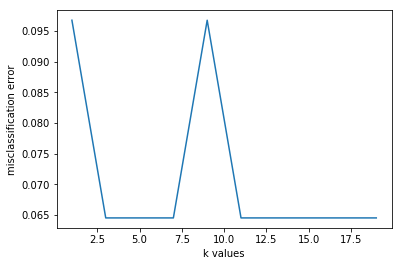

In [91]:
plt.plot(k_range2,MSE)
plt.xlabel('k values')
plt.ylabel('misclassification error')

### Question 11: Read the data given in bc2.csv file

In [117]:
bc2 = pd.read_csv('bc2.csv')


### Question 12: Observe the no.of records in dataset and type of each feature 

In [118]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


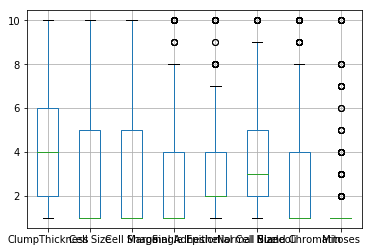

In [119]:
bc2_copy = bc2.drop(['ID','Class'],axis = 1)
bc2_copy.boxplot()
bc2.describe(include='all')
#No missing value
#outliers can be seen from boxplot

In [149]:
#In above example last 5 columns have maximum outlier
#encoding treament is necessary if applicable

In [148]:
for i in bc2_copy.columns :

        quantile75 = bc2_copy[i].quantile(0.75)

        quantile25  = bc2_copy[i].quantile(0.25)

        iqr = quantile75 - quantile25

        upperLimit = quantile75 + (1.5 * iqr)

        lowerlimit = quantile25 - (1.5 * iqr)

        print('The outliers for column {} is anything below {} and above {}'.format(i,lowerlimit,upperLimit))

The outliers for column ClumpThickness is anything below -4.0 and above 12.0
The outliers for column Cell Size is anything below -5.0 and above 11.0
The outliers for column Cell Shape is anything below -5.0 and above 11.0
The outliers for column Marginal Adhesion is anything below -3.5 and above 8.5
The outliers for column Single Epithelial Cell Size is anything below -1.0 and above 7.0
The outliers for column Bare Nuclei is anything below -5.0 and above 11.0
The outliers for column Normal Nucleoli is anything below -2.5 and above 9.5
The outliers for column Bland Chromatin is anything below -3.5 and above 8.5
The outliers for column Mitoses is anything below 1.0 and above 1.0


### Check Missing Values

In [120]:
bc2.info()
bc2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [124]:
bc2_copy.describe(include='all')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,418,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000


In [121]:
bc2['Bare Nuclei'].value_counts()
print("There are 16 ?")

There are 16 ?


In [122]:
bc2_copy['Bare Nuclei'].value_counts()
# print("There are 16 ?")

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [123]:
bc2_copy['Bare Nuclei'].replace('?',bc2_copy['Bare Nuclei'].describe().top,inplace=True)
bc2_copy['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Question 15: Find the distribution of target variable (Class) 

In [125]:
bc2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

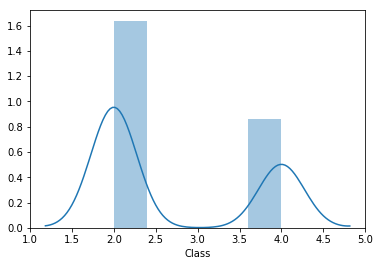

In [126]:
sns.distplot(bc2['Class'])

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

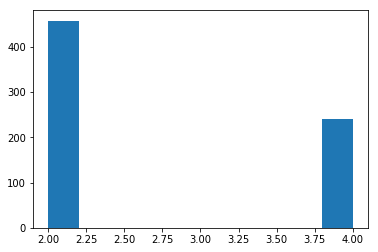

In [128]:
plt.hist(bc2['Class'])

### convert the datatype of Bare Nuclei to `int`

In [127]:
bc2_copy['Bare Nuclei'] = bc2_copy['Bare Nuclei'].astype('int')
bc2_copy['Bare Nuclei'].dtypes

dtype('int32')

### Question 16: Standardization of Data

In [132]:
sc1 = StandardScaler()
sc1.fit(bc2_copy)
standardized_data = sc1.transform(bc2_copy)
standardized_data

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

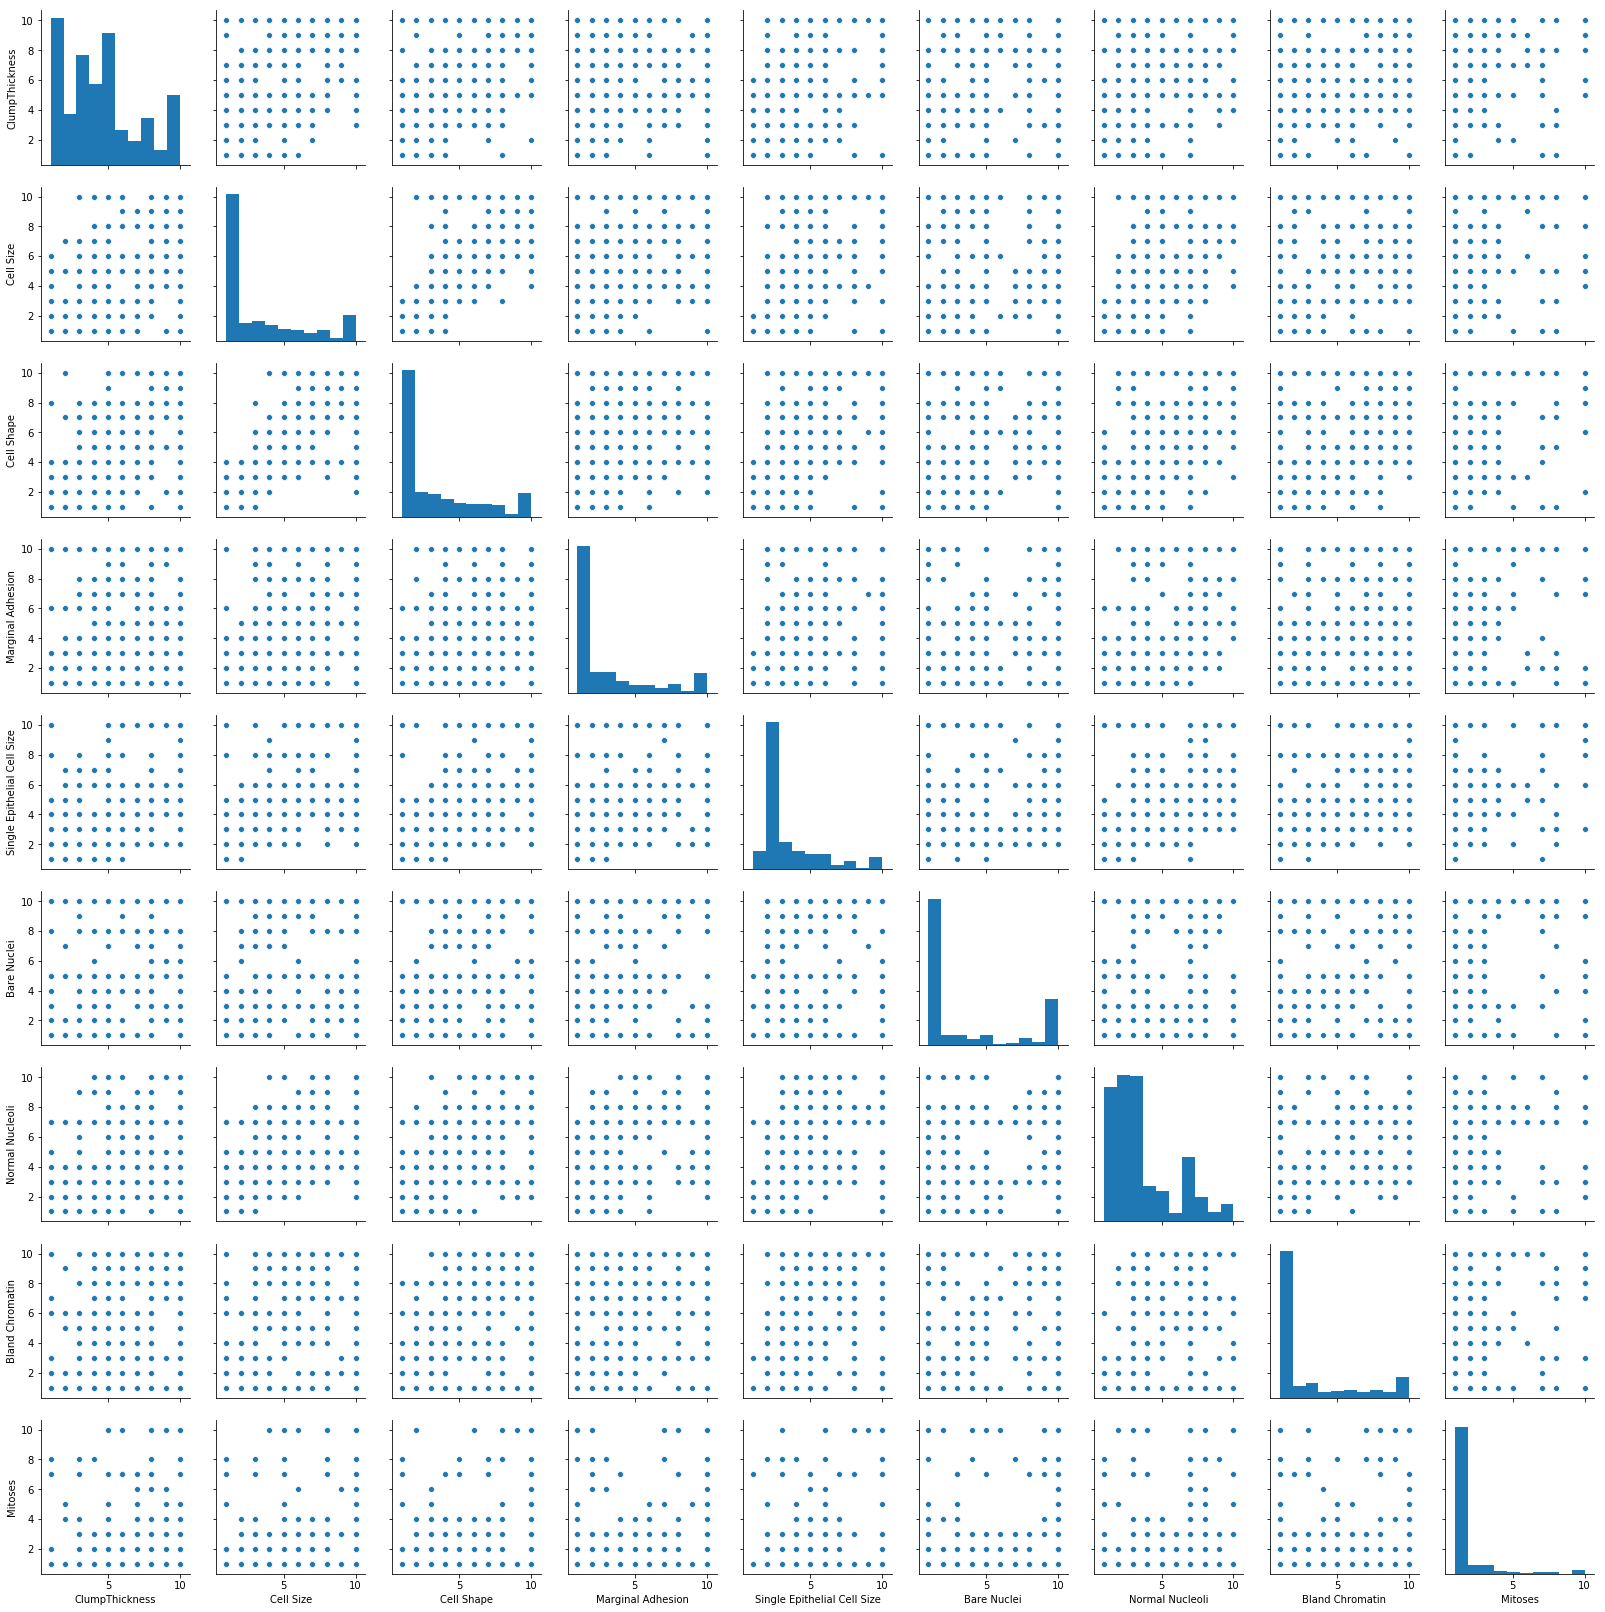

In [144]:
sns.pairplot(bc2_copy)

In [139]:
bc2_copy.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


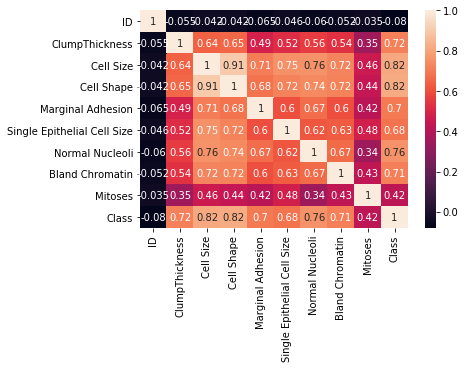

In [145]:
sns.heatmap(bc2.corr(),annot=True)

In [146]:
#cellshape and cell size are highly corelated
bc2_copy.drop(['Cell Size'],axis=1)

,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,2,1,3,1,1
1,5,4,5,7,10,3,2,1
2,3,1,1,2,2,3,1,1
3,6,8,1,3,4,3,7,1
4,4,1,3,2,1,3,1,1
5,8,10,8,7,10,9,7,1
6,1,1,1,2,10,3,1,1
7,2,2,1,2,1,3,1,1
8,2,1,1,2,1,1,1,5
9,4,1,1,2,1,2,1,1


### Question 18: Divide the dataset into feature set and target set

In [133]:
bc2_X = bc2_copy#X for train:FeatureSet dropped id and class
bc2_Y = bc2['Class'] #Y for train:TargetSet
print(bc2_X) 
print(bc2_Y)

     ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0                 5          1           1                  1   
1                 5          4           4                  5   
2                 3          1           1                  1   
3                 6          8           8                  1   
4                 4          1           1                  3   
5                 8         10          10                  8   
6                 1          1           1                  1   
7                 2          1           2                  1   
8                 2          1           1                  1   
9                 4          2           1                  1   
10                1          1           1                  1   
11                2          1           1                  1   
12                5          3           3                  3   
13                1          1           1                  1   
14                8      

### Divide the Training and Test sets in 70:30 

In [134]:
X_train, X_test, y_train, y_test = train_test_split(bc2_X, bc2_Y, test_size=0.30, random_state=10)


## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [135]:
sc3 = StandardScaler()
sc3.fit(X_train)
X_train_scalar = sc3.transform(X_train)
X_test_scalar = sc3.transform(X_test)

In [136]:
k_range2 = np.arange(1,20,2);
# print(k_range2)
MSE = []
for k_value in k_range2:
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train_scalar,y_train)
    y_predict = knn.predict(X_test_scalar)
#     print(metrics.accuracy_score(y_test,y_predict))
    MSE.append(1 - metrics.accuracy_score(y_test,y_predict))
   
    
print(MSE)
print("Lowest:",np.min(MSE))
print("Optimal Neighbor:",k_range2[MSE.index(min(MSE))])

[0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.03809523809523807, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]
Lowest: 0.033333333333333326
Optimal Neighbor: 1


### Question 20: Print the optimal number of neighbors

In [138]:
print("Optimal Neighbor:",k_range2[MSE.index(min(MSE))])

Optimal Neighbor: 1
